<a href="https://colab.research.google.com/github/marinahobday/housingProject3/blob/main/Housing_Prices__ANNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
#NEURAL NETWORK / DEEP LEARNING
# Create a  Neural Network and a Deep Neural Network. Then, compare the Accuracy and Validity of the Trained model .
#For the Housing price predictions
from keras.models import Sequential #(initializes ANN Artificial Neural Network)
from keras.layers import Dense #(number of layers, neurons per layer and activation function)
from keras.layers import Dropout
from sklearn.model_selection import train_test_split #(splits data into training and testing sets)
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import random
random.set_seed(1)


In [403]:
from google.colab import files
uploaded =files.upload()
df = pd.read_csv('HOUSING_DATA3.csv')
df

Saving HOUSING_DATA3.csv to HOUSING_DATA3 (10).csv


,RegionID,Year,Home_value
0,42415,2021,334409
1,42415,2020,332905
2,42415,2020,331546
3,42415,2020,334579
4,42415,2020,336513
...,...,...,...
2860,394692,1996,203496
2861,394692,1996,203364
2862,394692,1996,203177
2863,394692,1996,203184


In [404]:
#convert the data into an array

dataset=df.values
dataset

array([[ 42415,   2021, 334409],
       [ 42415,   2020, 332905],
       [ 42415,   2020, 331546],
       ...,
       [394692,   1996, 203177],
       [394692,   1996, 203184],
       [394692,   1996, 203086]])

In [405]:
#split the data into independent and dependent data sets

X = dataset[:, 0:3] #independent
Y = dataset[:,2] #col 2, home values


In [406]:
#Scale The dataset 
#use the min-max scaler method from sklearn.preprocessing so that as all features lies between 0 and 1 inclusive.
#create a standardscaler model

min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.03433666, 1.        , 0.29327876],
       [0.03433666, 0.96      , 0.29122075],
       [0.03433666, 0.96      , 0.28936115],
       ...,
       [0.99916192, 0.        , 0.11370643],
       [0.99916192, 0.        , 0.11371601],
       [0.99916192, 0.        , 0.11358191]])

In [407]:
#split the data into 80% training and 20% (testing (10%) and validating (10%))

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2) 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape) 

#Results below show that the training set has 2292 data points while the validation and test 
#set have 286 data points each.
#The X variables have 3 input features

(2292, 3) (286, 3) (287, 3) (2292,) (286,) (287,)


In [408]:
#Build the model and the layer structure of the deep neural network

model = Sequential()  #initializes ANN
model.add(Dense(units=32, activation='relu',input_dim=3))  #layer with 8 neurons
#model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu'))  #layer
#model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu'))  #layer
#model.add(Dropout(0.1))
model.add(Dense(units=1, activation='softmax'))  #layer # 1 neuron



In [409]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 32)                128       
_________________________________________________________________
dense_130 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_131 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 33        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


In [410]:
#Compile the model
#Loss function measures how well the model did on training, and then tries to improve on it using the optimizer

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['MSE']
              )

In [ ]:
#Fit the model to the training data
hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    #verbose=2,
    validation_data=(X_test, Y_test)
)

In [412]:
#Evaluate Model on testing set
#Model evaluation
model.evaluate(X_test, Y_test, batch_size=32)[1] 

9/9 [==============================] - 0s 1ms/step - loss: -30036060160.0000 - MSE: 169432875008.0000


169432875008.0

In [413]:
#loss, model_accuracy = model.evaluate(
    #X_val, Y_val, verbose=2)

In [ ]:
#Make prediction on Testing Dataset
prediction = model.predict(X_test)
prediction 

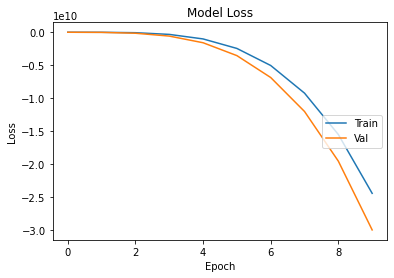

In [415]:
#Visualize the TRAINING LOSS and VALIDATION LOSS to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc="center right")



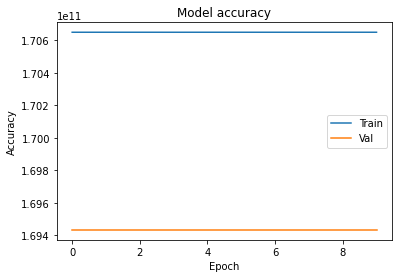

In [416]:
#Visualize the TRAINING ACCURACY and VALIDATION ACCURACY to see if the model is overfitting
plt.plot(hist.history['MSE'])
plt.plot(hist.history['val_MSE'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc="center right")